<a href="https://colab.research.google.com/github/spshreya/Data_science_projects/blob/main/Regression_Insureance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/competitions/playground-series-s4e12

In [1]:
import zipfile
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# # Replace 'your_file.zip' with the name of your uploaded ZIP file
# zip_file = "playground-series-s4e12.zip"

# # Create a directory to extract files
# extract_to = "./extracted"
# os.makedirs(extract_to, exist_ok=True)

# # Extract the ZIP file
# with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)

# print("Files extracted to:", extract_to)

In [4]:
# # Adjust the path as needed
# csv_file_path = os.path.join(extract_to, "train.csv")
train_df = pd.read_csv('train.csv')

In [5]:
test_df = pd.read_csv('test.csv')

In [ ]:
# csv_file_path = os.path.join(extract_to, "sample_submission.csv")
# sub_df = pd.read_csv(csv_file_path)

In [6]:
train_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [7]:
#sub_df.head()

In [8]:
train_df.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [9]:
train_df.shape

(1200000, 21)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [11]:
train_df.isnull().sum()/train_df.shape[0]*100

,0
id,0.000000
Age,1.558750
Gender,0.000000
Annual Income,3.745750
Marital Status,1.544083
Number of Dependents,9.139333
Education Level,0.000000
Occupation,29.839583
Health Score,6.173000
Location,0.000000


In [12]:
train_df[train_df['id'].duplicated()]

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount


In [13]:
train_df.set_index('id', inplace=True)

In [14]:
#!pip install missingno

In [15]:
import missingno as msno

<Axes: >

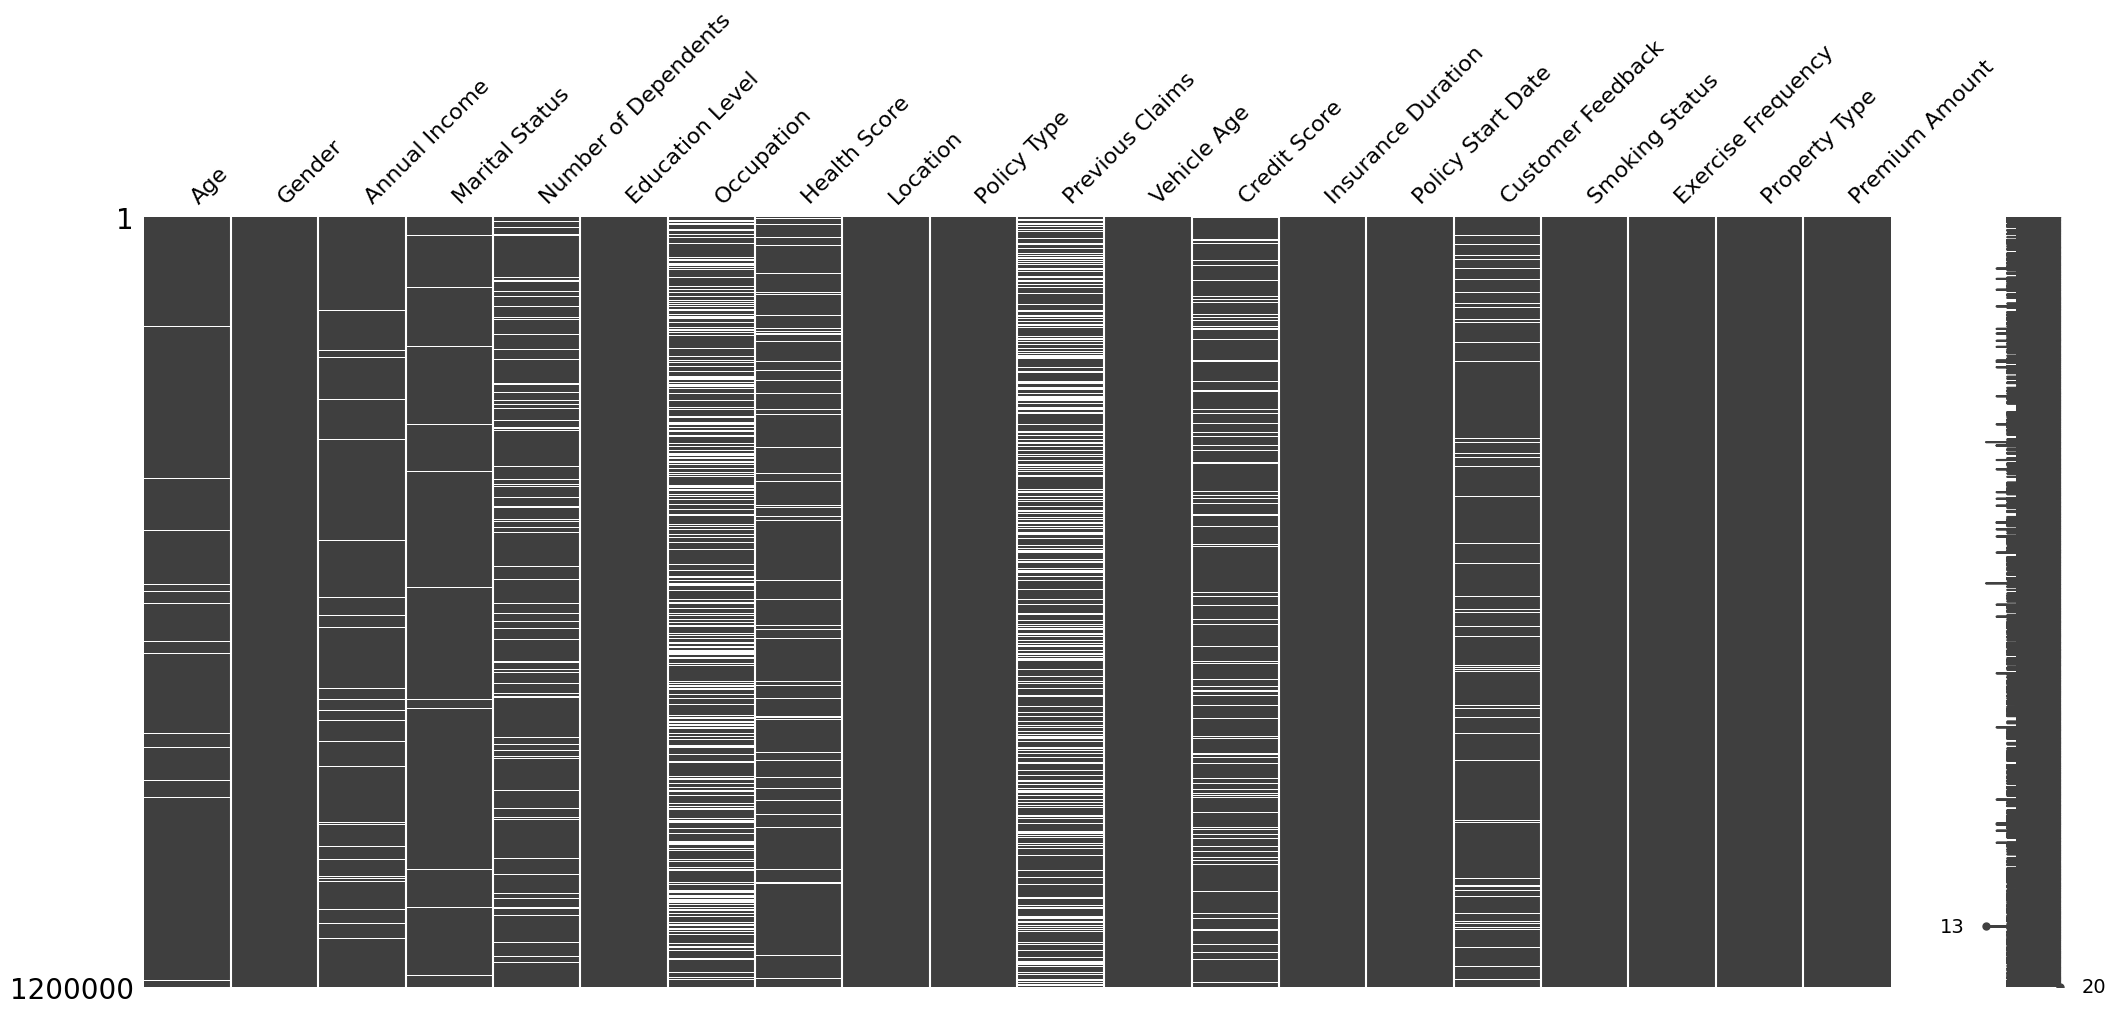

In [16]:
msno.matrix(train_df)

In [17]:
train_df.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [18]:
train_df[train_df['Annual Income']==1]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
1013454,20.0,Female,1.0,Single,0.0,Bachelor's,NaN,34.244299,Urban,Comprehensive,1.0,9.0,752.0,7.0,2023-05-31 15:21:39.263607,Good,No,Daily,Apartment,2063.0


In [19]:
train_df.loc[train_df['Annual Income'] == 1, 'Annual Income'] = np.nan

In [20]:
train_df[train_df['Annual Income']==1]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,


In [21]:
train_df['Policy Start Date'] = pd.to_datetime(train_df['Policy Start Date'])

In [22]:
print(train_df['Policy Start Date'].min(), train_df['Policy Start Date'].max())

2019-08-17 15:21:39.080371 2024-08-15 15:21:39.287115


In [23]:
train_df.describe(include=['object'])

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
count,1200000,1181471,1200000,841925,1200000,1200000,1122176,1200000,1200000,1200000
unique,2,3,4,3,3,3,3,2,4,3
top,Male,Single,Master's,Employed,Suburban,Premium,Average,Yes,Weekly,House
freq,602571,395391,303818,282750,401542,401846,377905,601873,306179,400349


In [24]:
df = train_df.copy()

In [25]:
# Check the unique values in each column
for col in ['Gender', 'Marital Status', 'Education Level', 'Occupation',
            'Location', 'Policy Type', 'Customer Feedback',
            'Smoking Status', 'Exercise Frequency', 'Property Type']:
    print(f"Unique values in {col}:")
    print(train_df[col].unique())
    print("\n")

Unique values in Gender:
['Female' 'Male']


Unique values in Marital Status:
['Married' 'Divorced' 'Single' nan]


Unique values in Education Level:
["Bachelor's" "Master's" 'High School' 'PhD']


Unique values in Occupation:
['Self-Employed' nan 'Employed' 'Unemployed']


Unique values in Location:
['Urban' 'Rural' 'Suburban']


Unique values in Policy Type:
['Premium' 'Comprehensive' 'Basic']


Unique values in Customer Feedback:
['Poor' 'Average' 'Good' nan]


Unique values in Smoking Status:
['No' 'Yes']


Unique values in Exercise Frequency:
['Weekly' 'Monthly' 'Daily' 'Rarely']


Unique values in Property Type:
['House' 'Apartment' 'Condo']




In [26]:
for col in ['Gender','Smoking Status','Marital Status', 'Education Level', 'Occupation',
            'Location', 'Policy Type', 'Customer Feedback',
            'Exercise Frequency', 'Property Type']:
    df[col] = df[col].astype('category').cat.codes


In [27]:
# Check the unique values in each column
for col in ['Gender', 'Marital Status', 'Education Level', 'Occupation',
            'Location', 'Policy Type', 'Customer Feedback',
            'Smoking Status', 'Exercise Frequency', 'Property Type']:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("\n")

Unique values in Gender:
[0 1]


Unique values in Marital Status:
[ 1  0  2 -1]


Unique values in Education Level:
[0 2 1 3]


Unique values in Occupation:
[ 1 -1  0  2]


Unique values in Location:
[2 0 1]


Unique values in Policy Type:
[2 1 0]


Unique values in Customer Feedback:
[ 2  0  1 -1]


Unique values in Smoking Status:
[0 1]


Unique values in Exercise Frequency:
[3 1 0 2]


Unique values in Property Type:
[2 0 1]




In [28]:
df[df['Premium Amount'].isnull()]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,


In [29]:
df.dropna(subset=['Premium Amount'], inplace=True)

In [30]:
df.drop('Policy Start Date', axis=1, inplace=True)

In [31]:
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,
0,19.0,0,10049.0,1,1.0,0,1,22.598761,2,2,2.0,17.0,372.0,5.0,2,0,3,2,2869.0
1,39.0,0,31678.0,0,3.0,2,-1,15.569731,0,1,1.0,12.0,694.0,2.0,0,1,1,2,1483.0
2,23.0,1,25602.0,0,3.0,1,1,47.177549,1,2,1.0,14.0,NaN,3.0,1,1,3,2,567.0
3,21.0,1,141855.0,1,2.0,0,-1,10.938144,0,0,1.0,0.0,367.0,1.0,2,1,0,0,765.0
4,21.0,1,39651.0,2,1.0,0,1,20.376094,0,2,0.0,8.0,598.0,4.0,2,1,3,2,2022.0


## Feature Importance with Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Prepare the features (X) and target (y)
df_sample = df.sample(frac=0.1, random_state=42)
X = df_sample.drop('Premium Amount', axis=1)
y = df_sample['Premium Amount']

# Initialize and fit a RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [33]:
# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)


Health Score            0.150466
Annual Income           0.149648
Credit Score            0.132396
Age                     0.100269
Vehicle Age             0.075487
Insurance Duration      0.053761
Number of Dependents    0.049725
Customer Feedback       0.040134
Education Level         0.031368
Exercise Frequency      0.031284
Occupation              0.031281
Marital Status          0.029755
Previous Claims         0.027711
Location                0.023672
Property Type           0.023393
Policy Type             0.023362
Smoking Status          0.013224
Gender                  0.013062
dtype: float64


## Feature importance with mutual information

In [46]:
from sklearn.feature_selection import mutual_info_regression

df_sample = df.sample(frac=0.1, random_state=42)
X = df_sample.drop('Premium Amount', axis=1)
y = df_sample['Premium Amount']
# Compute mutual information
mi_scores = mutual_info_regression(X.fillna(-1), y)  # Replace NaNs with a placeholder
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores.sort_values(ascending=False, inplace=True)
print(mi_scores)

Annual Income           0.097224
Health Score            0.090388
Credit Score            0.022553
Age                     0.005845
Previous Claims         0.005463
Exercise Frequency      0.004495
Number of Dependents    0.003637
Customer Feedback       0.002459
Policy Type             0.001910
Occupation              0.001903
Marital Status          0.000730
Insurance Duration      0.000275
Smoking Status          0.000165
Location                0.000028
Gender                  0.000000
Vehicle Age             0.000000
Education Level         0.000000
Property Type           0.000000
dtype: float64


The Random Forest Regressor and Mutual Information Regressor have produced different feature importance results, which is expected because:

Random Forest Regressor evaluates features based on their contribution to reducing variance (split quality) across all trees.
Mutual Information measures the dependency between each feature and the target, capturing non-linear relationships but considering them independently of the model.
Analysis of the Results
1. Top Features (Random Forest)
The most important features are:

Health Score
Annual Income
Credit Score
Age
Vehicle Age
2. Top Features (Mutual Information)
The most dependent features are:

Annual Income
Health Score
Credit Score
Observations
Agreement on Key Features:
Both methods agree that Annual Income, Health Score, and Credit Score are important. This adds confidence in these features being relevant to the target variable (Premium Amount).

Differences in Rankings:

Random Forest highlights Age, Vehicle Age, and Insurance Duration as important, but these have very low scores in Mutual Information.
Mutual Information downplays these because it evaluates each feature independently and does not capture feature interactions that Random Forest leverages.
Low or Zero Importance:

Mutual Information gives zero importance to Gender, Education Level, and Property Type, which could be due to these features having little or no direct association with the target.
Random Forest assigns minimal importance to these features, possibly capturing some minor interactions.

In [34]:
import shap

explainer = shap.Explainer(model)

In [35]:
X_sample = X.sample(n=100, random_state=42)

shap_values = explainer.shap_values(X_sample)

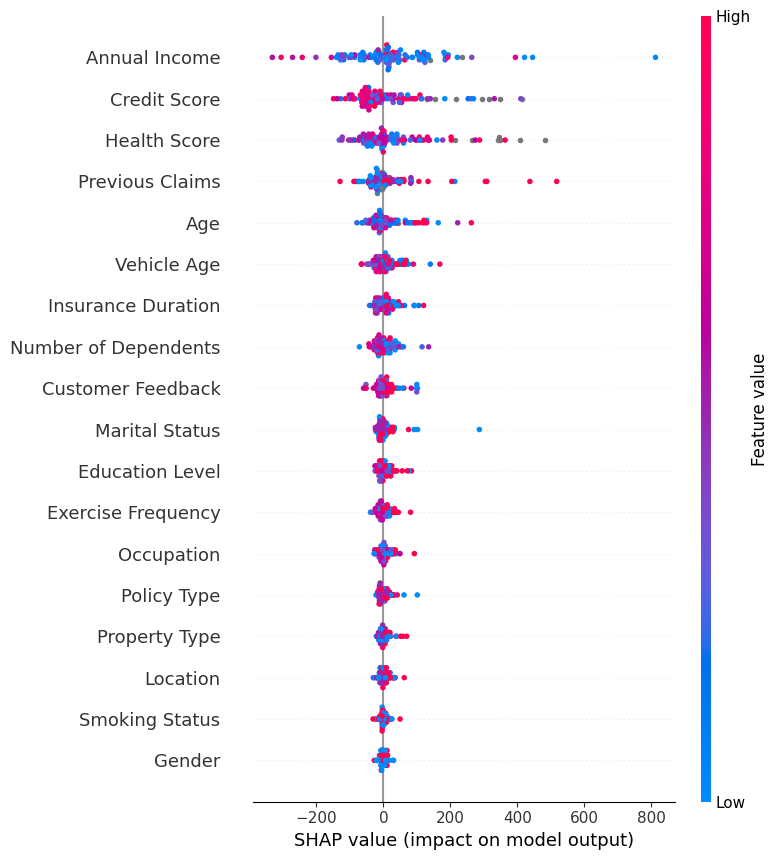

In [36]:
shap.summary_plot(shap_values, X_sample)

In [38]:
X.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dtype='object')

In [41]:
features = ['Annual Income', 'Health Score', 'Credit Score', 'Age', 'Vehicle Age','Previous Claims', 'Premium Amount']

In [42]:
df_features = train_df[features]

In [43]:
df_features.head()

,Annual Income,Health Score,Credit Score,Age,Vehicle Age,Previous Claims,Premium Amount
id,,,,,,,
0,10049.0,22.598761,372.0,19.0,17.0,2.0,2869.0
1,31678.0,15.569731,694.0,39.0,12.0,1.0,1483.0
2,25602.0,47.177549,NaN,23.0,14.0,1.0,567.0
3,141855.0,10.938144,367.0,21.0,0.0,1.0,765.0
4,39651.0,20.376094,598.0,21.0,8.0,0.0,2022.0


In [44]:
df_features.isnull().sum()

,0
Annual Income,44950
Health Score,74076
Credit Score,137882
Age,18705
Vehicle Age,6
Previous Claims,364029
Premium Amount,0


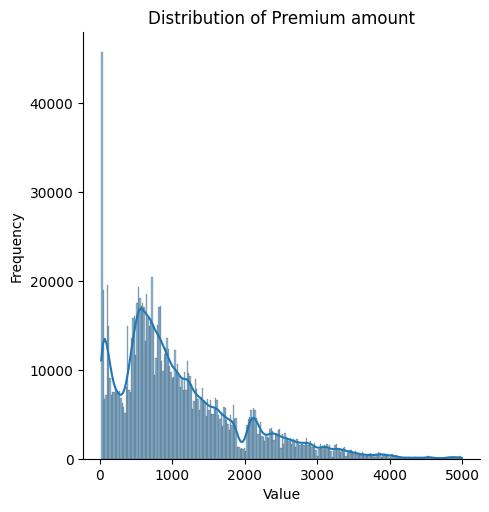

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the column you want to plot
sns.displot(df_features['Premium Amount'], kde=True)  # kde=True adds a Kernel Density Estimate (smooth curve)

# Customize plot (optional)
plt.title('Distribution of Premium amount')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

https://datascience.stackexchange.com/questions/122585/ml-regression-for-skewed-data
